In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = '/home/olga/data_sm/kmer-hashing/classify_coding_vs_noncoding/'

In [3]:
cd $folder/mouse_lemur_B001498_B109060_A8_S8_test

/mnt/data_sm/olga/kmer-hashing/classify_coding_vs_noncoding/mouse_lemur_B001498_B109060_A8_S8_test


In [4]:
ls -1

B001498_B109060_A8_S8_ground_truth_read_ids.txt@
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed.fastq@
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-10.coding_peptides.fasta
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-10__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-10.low_complexity_nucleotides.fasta
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-10.low_complexity_peptides.fasta
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-10.noncoding_nucleotides.fasta
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-11.coding_peptides.fasta
B001498_B109060_A8_S

In [5]:
ls *csv

B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-10__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-11__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-12__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-13__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-14__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-15__coding_scores.csv
B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-dayhoff__ksize-16__coding_scores.csv
B001498_B109060_A8_S8_R1_001_groun

In [6]:
ls *fastq

B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed.fastq@
B001498_B109060_A8_S8_R1_001_ground_truth.fastq@
B001498_B109060_A8_S8_R2_001_ground_truth.fastp_trimmed.fastq@
B001498_B109060_A8_S8_R2_001_ground_truth.fastq@


In [7]:
from itertools import product


import pandas as pd
from sklearn import metrics


df_r2 = pd.read_csv("B001498_B109060_A8_S8_R2_coding_ground_truth.csv")
df_r2 = df_r2.drop_duplicates(subset='sequence_id')
df_r2 = df_r2.set_index('sequence_id')
print(df_r2.shape)
df_r2.head()

(17, 6)


,sequence,Chrom,start,is_coding,Notes,Alignment
sequence_id,,,,,,
A00111:356:HMHLCDSXX:1:1114:10330:17754,TTCTCGGTGTGCCATTGTGTGCCAACGCTTTCAGGCTGGGGGCACT...,NaN,NaN,True,NaN,NaN
A00111:356:HMHLCDSXX:1:1120:3703:32393,GTTAAAGCCTCCATGTAGTCATCCTGTGCATCAATGACATATATCA...,NC_033661.1,36523128.0,True,In a splice junction,NaN
A00111:356:HMHLCDSXX:1:1140:10059:21073,TCCTTTAAGTAAAGGACAGTTGTATTATTCAGCTTGATAATTGCCA...,NC_033661.1,36513997.0,True,Is spliced,NaN
A00111:356:HMHLCDSXX:1:1157:31910:28134,TCCTTTAAGTAAAGGACAGTTGTATTATTCAGCTTGATAATTGCCA...,NC_033661.1,36513997.0,True,Is spliced,NaN
A00111:356:HMHLCDSXX:1:2136:11198:13870,ATACAAGACACGTCAATCACAACATCAATCATGTCACAGCAAAGTT...,NC_033661.1,36518199.0,True,NaN,NaN


In [8]:
df_r2.index.values

array(['A00111:356:HMHLCDSXX:1:1114:10330:17754',
       'A00111:356:HMHLCDSXX:1:1120:3703:32393',
       'A00111:356:HMHLCDSXX:1:1140:10059:21073',
       'A00111:356:HMHLCDSXX:1:1157:31910:28134',
       'A00111:356:HMHLCDSXX:1:2136:11198:13870',
       'A00111:356:HMHLCDSXX:1:2314:30346:22701',
       'A00111:356:HMHLCDSXX:2:1136:1570:24345',
       'A00111:356:HMHLCDSXX:2:1216:21305:14152',
       'A00111:356:HMHLCDSXX:2:1322:2067:33505',
       'A00111:356:HMHLCDSXX:2:2402:18954:24580',
       'A00111:356:HMHLCDSXX:3:2340:17689:22545',
       'A00111:356:HMHLCDSXX:3:2350:3974:4366',
       'A00111:356:HMHLCDSXX:4:1109:9787:19132',
       'A00111:356:HMHLCDSXX:4:1129:16767:35947',
       'A00111:356:HMHLCDSXX:4:2331:15619:19742',
       'A00111:356:HMHLCDSXX:4:2561:23710:28745',
       'A00111:356:HMHLCDSXX:2:2158:21739:9079'], dtype=object)

In [9]:
df_r1 = pd.read_csv("B001498_B109060_A8_S8_R1_coding_ground_truth.csv")
df_r1 = df_r1.drop_duplicates(subset='sequence_id')
df_r1 = df_r1.set_index('sequence_id')
print(df_r1.shape)
df_r1.head()

(17, 6)


,sequence,chrom,start,is_coding,Notes,Alignment
sequence_id,,,,,,
A00111:356:HMHLCDSXX:1:1114:10330:17754,GATATAAAGATATTTAATAGGTTTTCCAAGGTTGGCAGTTGTGGGA...,NC_033661.1,36519392,True,NaN,NaN
A00111:356:HMHLCDSXX:1:1120:3703:32393,TGGAGCTGTCAGCGCCCCCCGGGCCACAGCCTCGTACTGCAGGGAC...,NC_033661.1,36526348,False,Overlaps start codon,NaN
A00111:356:HMHLCDSXX:1:1140:10059:21073,CTCATCTCTAGTGGGACAGGCACCAGAGTCCCACAAGCAGCAGTTC...,NC_033661.1,36508568,False,NaN,NaN
A00111:356:HMHLCDSXX:1:1157:31910:28134,CGGCATCCGACCCTGGAGTGAAGAGTAAGCTGGCACGGAGTCCCGA...,NC_033661.1,36508631,False,overlaps stop codon,NaN
A00111:356:HMHLCDSXX:1:2136:11198:13870,GTCTTTATAAATCTTGTTGGTACTTTCCAAAAAGAGGGTCTCATTG...,NC_033661.1,36524286,True,Spliced,NaN


In [10]:
true_classifications = {"R1": df_r1, "R2": df_r2}

In [11]:
# %%time


reads = 'B001498_B109060_A8_S8_R1_001_ground_truth.fastp_trimmed.fastq B001498_B109060_A8_S8_R2_001_ground_truth.fastp_trimmed.fastq'
peptides = f"{folder}/Homo_sapiens.GRCh38.pep.all.fa.gz"
partition = '/home/olga/miniconda3/envs/kmer-hashing/bin/khtools partition'

ksizes = range(4, 22)
molecules = 'protein', 'dayhoff'

dfs = []

for ksize, molecule in product(ksizes, molecules):
#     print(f"ksize: {ksize}, molecule: {molecule}")
    suffix = f"__Homo_sapiens.GRCh38.pep.all.fa.gz__molecule-{molecule}__ksize-{ksize}__coding_scores.csv"
    for read in "R1", "R2":
#         print(f"read: {read}")
        true = true_classifications[read]
        csv = f"B001498_B109060_A8_S8_{read}_001_ground_truth.fastp_trimmed{suffix}"
        try:
            df = pd.read_csv(csv)
            df['read'] = read
            df['read_id_cleaned'] = df['read_id'].str.split().str[0]
            df['y_true'] = true.is_coding.loc[df.read_id_cleaned.values].values
            df['molecule'] = molecule
            df['ksize'] = ksize
            dfs.append(df)
        except FileNotFoundError:
            pass
coding_scores = pd.concat(dfs)
print(coding_scores.shape)


coding_scores.head()

(1224, 9)


,read_id,jaccard_in_peptide_db,n_kmers,classification,read,read_id_cleaned,y_true,molecule,ksize
0,A00111:356:HMHLCDSXX:1:1114:10330:17754 1:N:0:...,1.0,29,coding,R1,A00111:356:HMHLCDSXX:1:1114:10330:17754,True,protein,4
1,A00111:356:HMHLCDSXX:1:1120:3703:32393 1:N:0:T...,1.0,30,coding,R1,A00111:356:HMHLCDSXX:1:1120:3703:32393,False,protein,4
2,A00111:356:HMHLCDSXX:1:1140:10059:21073 1:N:0:...,1.0,29,coding,R1,A00111:356:HMHLCDSXX:1:1140:10059:21073,False,protein,4
3,A00111:356:HMHLCDSXX:1:1157:31910:28134 1:N:0:...,1.0,29,coding,R1,A00111:356:HMHLCDSXX:1:1157:31910:28134,False,protein,4
4,A00111:356:HMHLCDSXX:1:2136:11198:13870 1:N:0:...,1.0,29,coding,R1,A00111:356:HMHLCDSXX:1:2136:11198:13870,True,protein,4


In [12]:
coding_scores.dtypes

read_id                   object
jaccard_in_peptide_db    float64
n_kmers                    int64
classification            object
read                      object
read_id_cleaned           object
y_true                      bool
molecule                  object
ksize                      int64
dtype: object

In [13]:
average_precision_scores = coding_scores.groupby(['molecule', 'ksize']).apply(lambda x: metrics.average_precision_score(x['y_true'], x['jaccard_in_peptide_db']))
average_precision_scores = average_precision_scores.reset_index()
average_precision_scores = average_precision_scores.rename(columns={0: "value"})
average_precision_scores

,molecule,ksize,value
0,dayhoff,4,0.903880
1,dayhoff,5,0.903788
2,dayhoff,6,0.903788
3,dayhoff,7,0.903788
4,dayhoff,8,0.903788
5,dayhoff,9,0.960994
6,dayhoff,10,0.991028
7,dayhoff,11,0.988492
8,dayhoff,12,0.988446
9,dayhoff,13,0.991798


In [14]:
roc_auc_scores = coding_scores.groupby(['molecule', 'ksize']).apply(lambda x: metrics.roc_auc_score(x['y_true'], x['jaccard_in_peptide_db']))
roc_auc_scores = roc_auc_scores.reset_index()
roc_auc_scores = roc_auc_scores.rename(columns={0: "value"})
roc_auc_scores

,molecule,ksize,value
0,dayhoff,4,0.451613
1,dayhoff,5,0.451613
2,dayhoff,6,0.451613
3,dayhoff,7,0.451613
4,dayhoff,8,0.451613
5,dayhoff,9,0.763441
6,dayhoff,10,0.908602
7,dayhoff,11,0.881720
8,dayhoff,12,0.887097
9,dayhoff,13,0.919355


In [15]:
# recall_scores = coding_scores.groupby(['molecule', 'ksize']).apply(lambda x: metrics.average_precision_score(x['y_true'], x['jaccard_in_peptide_db']))
# recall_scores = recall_scores.reset_index()
# recall_scores = recall_scores.rename(columns={0: "value"})
# recall_scores

## Look at misclassifications

### False negatives -- jaccard was too low

In [16]:
coding_scores.query("ksize == 10 & y_true == True & classification != 'coding'")

,read_id,jaccard_in_peptide_db,n_kmers,classification,read,read_id_cleaned,y_true,molecule,ksize
5,A00111:356:HMHLCDSXX:1:2314:30346:22701 1:N:0:...,0.458333,24,non-coding,R1,A00111:356:HMHLCDSXX:1:2314:30346:22701,True,protein,10
6,A00111:356:HMHLCDSXX:2:1136:1570:24345 1:N:0:T...,0.782609,23,non-coding,R1,A00111:356:HMHLCDSXX:2:1136:1570:24345,True,protein,10
9,A00111:356:HMHLCDSXX:2:2158:21739:9079 1:N:0:T...,0.250000,24,non-coding,R1,A00111:356:HMHLCDSXX:2:2158:21739:9079,True,protein,10
11,A00111:356:HMHLCDSXX:3:2340:17689:22545 1:N:0:...,0.750000,24,non-coding,R1,A00111:356:HMHLCDSXX:3:2340:17689:22545,True,protein,10
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.000000,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,protein,10
13,A00111:356:HMHLCDSXX:4:1109:9787:19132 1:N:0:T...,0.791667,24,non-coding,R1,A00111:356:HMHLCDSXX:4:1109:9787:19132,True,protein,10
0,A00111:356:HMHLCDSXX:1:1114:10330:17754 2:N:0:...,0.458333,24,non-coding,R2,A00111:356:HMHLCDSXX:1:1114:10330:17754,True,protein,10
3,A00111:356:HMHLCDSXX:1:1157:31910:28134 2:N:0:...,0.565217,23,non-coding,R2,A00111:356:HMHLCDSXX:1:1157:31910:28134,True,protein,10
9,A00111:356:HMHLCDSXX:2:2158:21739:9079 2:N:0:T...,0.833333,24,non-coding,R2,A00111:356:HMHLCDSXX:2:2158:21739:9079,True,protein,10
9,A00111:356:HMHLCDSXX:2:2158:21739:9079 1:N:0:T...,0.250000,24,non-coding,R1,A00111:356:HMHLCDSXX:2:2158:21739:9079,True,dayhoff,10


In [17]:
coding_scores.classification.unique()

array(['coding', 'non-coding'], dtype=object)

In [18]:
coding_scores.query("ksize == 10 & y_true == False & classification != 'non-coding'")

,read_id,jaccard_in_peptide_db,n_kmers,classification,read,read_id_cleaned,y_true,molecule,ksize


In [19]:
read_id = 'A00111:356:HMHLCDSXX:3:2350:3974:4366'

coding_scores.query('read_id_cleaned == @read_id & read == "R1"')

,read_id,jaccard_in_peptide_db,n_kmers,classification,read,read_id_cleaned,y_true,molecule,ksize
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,protein,4
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,dayhoff,4
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,protein,5
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,dayhoff,5
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,protein,6
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,dayhoff,6
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,protein,7
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,dayhoff,7
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,protein,8
12,A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TG...,0.0,0,non-coding,R1,A00111:356:HMHLCDSXX:3:2350:3974:4366,True,dayhoff,8


In [20]:
! grep -A 3 $read_id  -h B001498_B109060_A8_S8_R1_001_ground_truth*.fastq

@A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TGTGTCCACTCC+CTCCATAAGGGA
GGATGACTACATGGAGGCTTTAACAAGACTTCACATTACTGTTTCTAAAGCCTCCATGTAGTCATCCTGTGCATCAATGACATAAATCAATGCTCCTGTT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,FFFFFFFFFFF:FFF
--
@A00111:356:HMHLCDSXX:3:2350:3974:4366 1:N:0:TGTGTCCACTCC+CTCCATAAGGGA
GGATGACTACATGGAGGCTTTAACAAGACTTCACATTACTGTTTCTAAAGCCTCCATGTAGTCATCCTGTGCATCAATGACATAAATCAATGCTCCTGTT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,FFFFFFFFFFF:FFF


This read wasn't trimmed at all.. okay so we shouldn't expect this to match then

### Check another read that needed trimming

In [21]:
# This read needed 35b trimming
read_id = 'A00111:356:HMHLCDSXX:2:1322:2067:33505'

coding_scores.query('read_id_cleaned == @read_id & read == "R1"')

,read_id,jaccard_in_peptide_db,n_kmers,classification,read,read_id_cleaned,y_true,molecule,ksize
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,20,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,protein,4
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,20,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,dayhoff,4
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,19,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,protein,5
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,19,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,dayhoff,5
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,18,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,protein,6
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,18,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,dayhoff,6
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,17,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,protein,7
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,17,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,dayhoff,7
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,16,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,protein,8
8,A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:T...,1.0,16,coding,R1,A00111:356:HMHLCDSXX:2:1322:2067:33505,True,dayhoff,8


In [22]:
! grep -A 3 -h $read_id  B001498_B109060_A8_S8_R1_001_ground_truth*.fastq

@A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:TGTGTCCACTCC+CTCCATAAGGGA
GCTCCTGTGAGAAGTCACGCCCACTTCAAAAACCTCATGAATAGCTTTTCGGAAACAGTGGAAATTGTAG
+
,,FFFF:FFFFFF:FFFF:FFFFF:FFFF:F::FFFFFFFF:F:FFFFFFFFFFFFFFFFFFFFF:FFFF
--
@A00111:356:HMHLCDSXX:2:1322:2067:33505 1:N:0:TGTGTCCACTCC+CTCCATAAGGGA
GCTCCTGTGAGAAGTCACGCCCACTTCAAAAACCTCATGAATAGCTTTTCGGAAACAGTGGAAATTGTAGCTGTCTCTTATACACATCTCCGAGCCCACG
+
,,FFFF:FFFFFF:FFFF:FFFFF:FFFF:F::FFFFFFFF:F:FFFFFFFFFFFFFFFFFFFFF:FFFFFFF:FFFF:FFFFFFFFF:FFFFFFFFFFF


## Set this one read's R1 sample as noncoding because of trimming issues

In [23]:
read_id = 'A00111:356:HMHLCDSXX:3:2350:3974:4366'

rows = (coding_scores.read_id_cleaned == read_id) & (coding_scores.read == "R1")
coding_scores.loc[rows, 'y_true'] = False

### Recalculate precision scores and AUC

In [24]:
average_precision_scores = coding_scores.groupby(['molecule', 'ksize']).apply(lambda x: metrics.average_precision_score(x['y_true'], x['jaccard_in_peptide_db']))
average_precision_scores = average_precision_scores.reset_index()
average_precision_scores = average_precision_scores.rename(columns={0: "value"})
average_precision_scores

,molecule,ksize,value
0,dayhoff,4,0.903617
1,dayhoff,5,0.903522
2,dayhoff,6,0.903522
3,dayhoff,7,0.903522
4,dayhoff,8,0.903522
5,dayhoff,9,0.962635
6,dayhoff,10,0.993670
7,dayhoff,11,0.991050
8,dayhoff,12,0.991002
9,dayhoff,13,0.994466


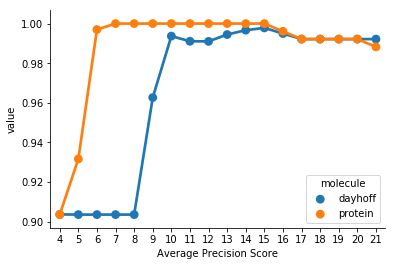

In [25]:
fig, ax = plt.subplots()
sns.pointplot('ksize', 'value', data=average_precision_scores, hue='molecule')
ax.set(xlabel="Average Precision Score")
sns.despine()

In [26]:
roc_auc_scores = coding_scores.groupby(['molecule', 'ksize']).apply(lambda x: metrics.roc_auc_score(x['y_true'], x['jaccard_in_peptide_db']))
roc_auc_scores = roc_auc_scores.reset_index()
roc_auc_scores = roc_auc_scores.rename(columns={0: "value"})
roc_auc_scores

,molecule,ksize,value
0,dayhoff,4,0.600000
1,dayhoff,5,0.600000
2,dayhoff,6,0.600000
3,dayhoff,7,0.600000
4,dayhoff,8,0.600000
5,dayhoff,9,0.841667
6,dayhoff,10,0.954167
7,dayhoff,11,0.933333
8,dayhoff,12,0.937500
9,dayhoff,13,0.962500


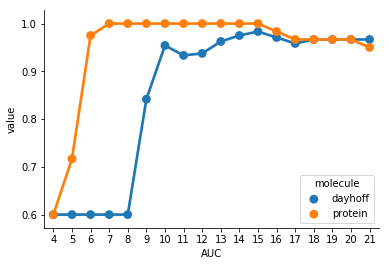

In [27]:
fig, ax = plt.subplots()
sns.pointplot('ksize', 'value', data=roc_auc_scores, hue='molecule')
ax.set(xlabel="AUC")
sns.despine()